# 0.0. Install Libraries

In [1]:
# Importando a biblioteca necessária
from google.colab import drive

# Montando o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.0. Import Libraries

In [2]:
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

plt.style.use('fivethirtyeight')

# 2.0. Data Acquisition

ANO-DIA-MES

In [3]:
HOME_PATH = "/content/drive/MyDrive/GNNs/"

In [4]:
influd23 = pd.read_csv(HOME_PATH + "INFLUD23-08-07-2024.csv", delimiter=';', low_memory=False)
influd23['DT_NOTIFIC'] = pd.to_datetime(influd23['DT_NOTIFIC'], errors='coerce', format='%d/%m/%Y')
influd23 = influd23.dropna(subset=['DT_NOTIFIC'])
series_influd23 = influd23["DT_NOTIFIC"].value_counts().sort_index()
series_influd23 = series_influd23[series_influd23.index.year == 2023]

In [5]:
influd24 = pd.read_csv(HOME_PATH + "INFLUD24-08-07-2024.csv", delimiter=';', low_memory=False)
influd24['DT_NOTIFIC'] = pd.to_datetime(influd24['DT_NOTIFIC'], errors='coerce', format='%d/%m/%Y')
influd24 = influd24.dropna(subset=['DT_NOTIFIC'])
series_influd24 = influd24["DT_NOTIFIC"].value_counts().sort_index()
series_influd24 = series_influd24[series_influd24.index.year == 2024]

In [6]:
series_influd23.head(1)

DT_NOTIFIC
2023-01-01    68
Name: count, dtype: int64

In [7]:
series_influd24.tail(1)

DT_NOTIFIC
2024-07-07    45
Name: count, dtype: int64

# DAY

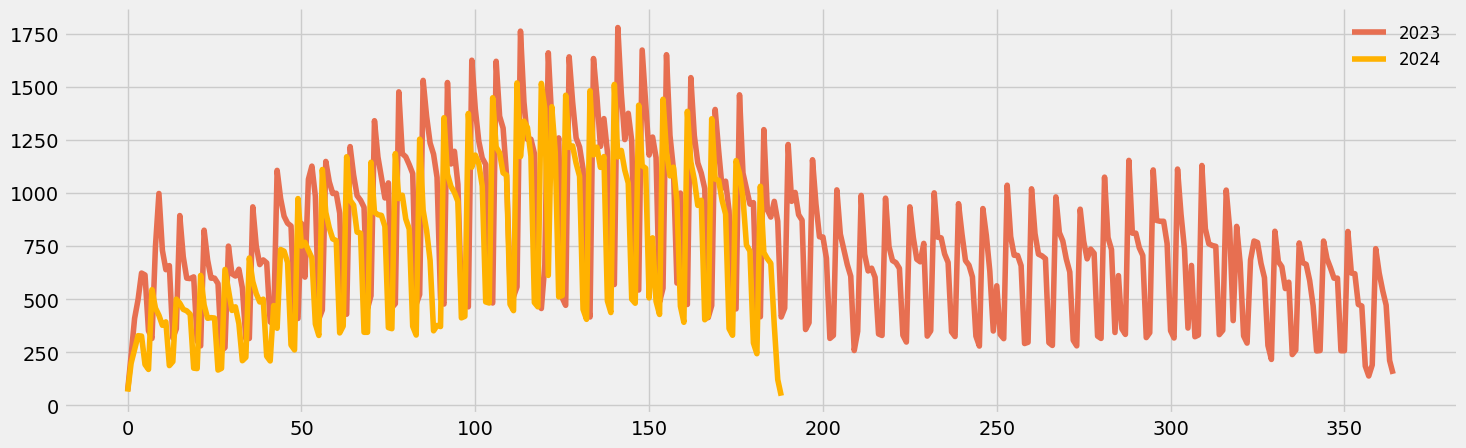

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.plot(list(range(len(series_influd23))), series_influd23, label="2023", c="#E76F51")
ax.plot(list(range(len(series_influd24))), series_influd24, label="2024", c="#FFB200")

ax.legend(frameon=False, fontsize=12)

plt.show()

In [9]:
concat = pd.concat([series_influd23, series_influd24])

concat.to_csv("2023-2024.csv")

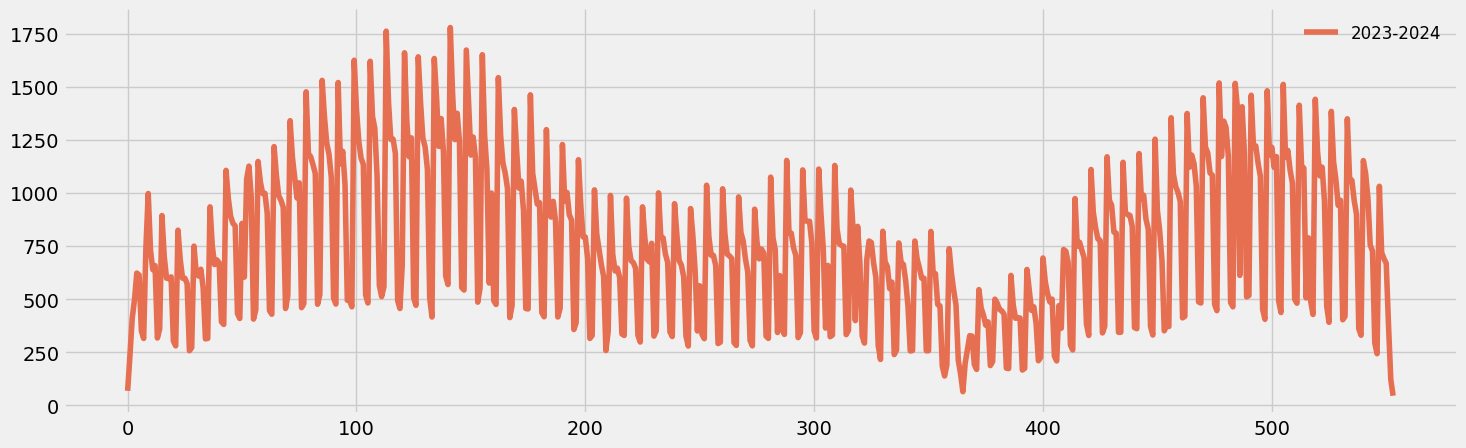

In [10]:
fig, ax = plt.subplots(figsize=(16, 5))

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.plot(list(range(len(concat))), concat, label="2023-2024", c="#E76F51")

ax.legend(frameon=False, fontsize=12)

plt.show()

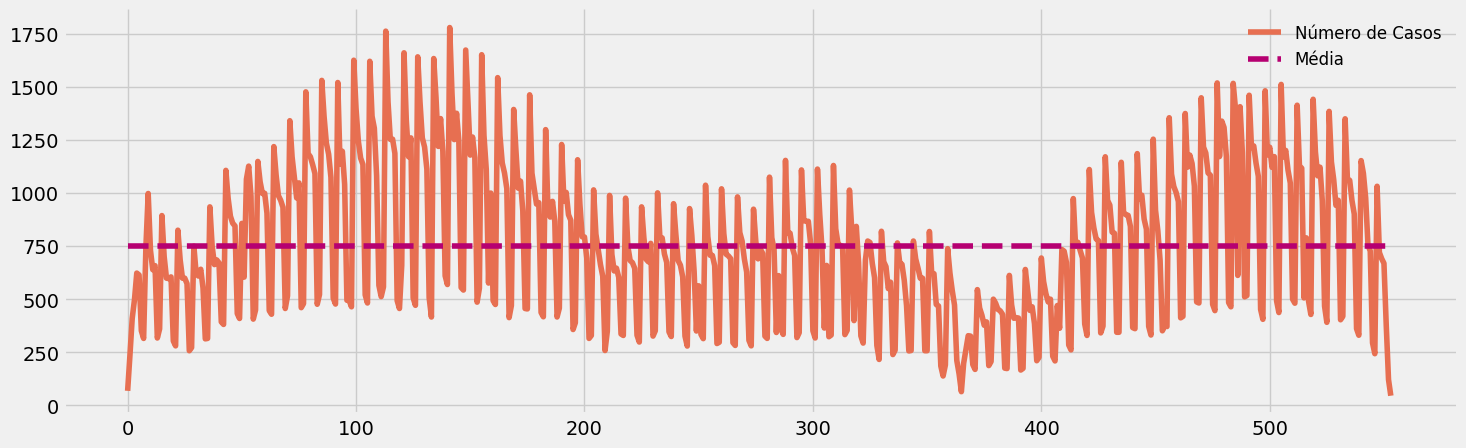

In [11]:
fig, ax = plt.subplots(figsize=(16, 5))

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.plot(list(range(len(concat))), concat, label="Número de Casos", c="#E76F51")
ax.hlines(concat.mean(), 0, len(concat), color="#B60071", linestyles="dashed", label="Média")

ax.legend(frameon=False, fontsize=12)

plt.show()

In [12]:
concat.mean()

750.0649819494585

**Teste de Estacionariedade (Dickey-Fuller)**

Hipóteses:
- Hipótese Nula (H0): A série tem uma raiz unitária (não estacionária).
- Hipótese Alternativa (H1): A série não tem uma raiz unitária (estacionária).

In [13]:
# Teste de Estacionariedade (Dickey-Fuller)
result_adf = adfuller(concat)
print('Estatística ADF:', result_adf[0])
print('p-valor:', result_adf[1])
print('Valores críticos:', result_adf[4])

Estatística ADF: -1.6135249749290324
p-valor: 0.47612549527825776
Valores críticos: {'1%': -3.4425861905056556, '5%': -2.8669372502674824, '10%': -2.5696445454608505}


**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

Hipóteses:
- Hipótese Nula (H0): A série é estacionária (sem raiz unitária).
- Hipótese Alternativa (H1): A série não é estacionária (tem uma raiz unitária).

In [14]:
# Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
result_kpss = kpss(concat, regression='c')
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Valores críticos:', result_kpss[3])

KPSS Statistic: 0.5867826319072994
p-value: 0.023837942553881872
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


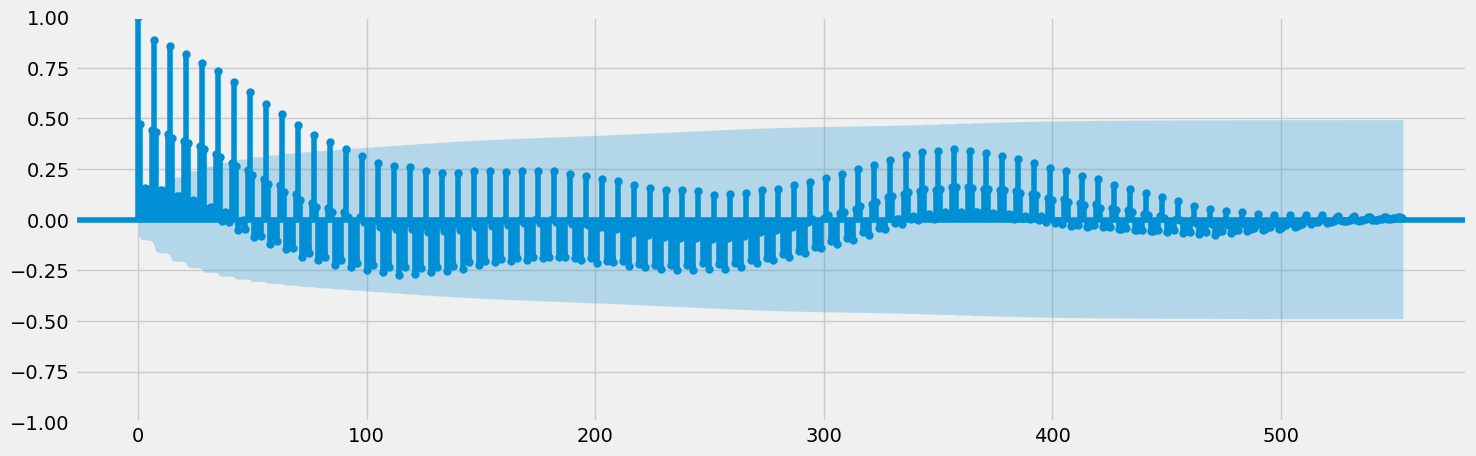

In [16]:
fig, ax = plt.subplots(figsize=(16, 5))

plot_acf(concat, lags=553, ax=ax)

plt.title("")

plt.show()

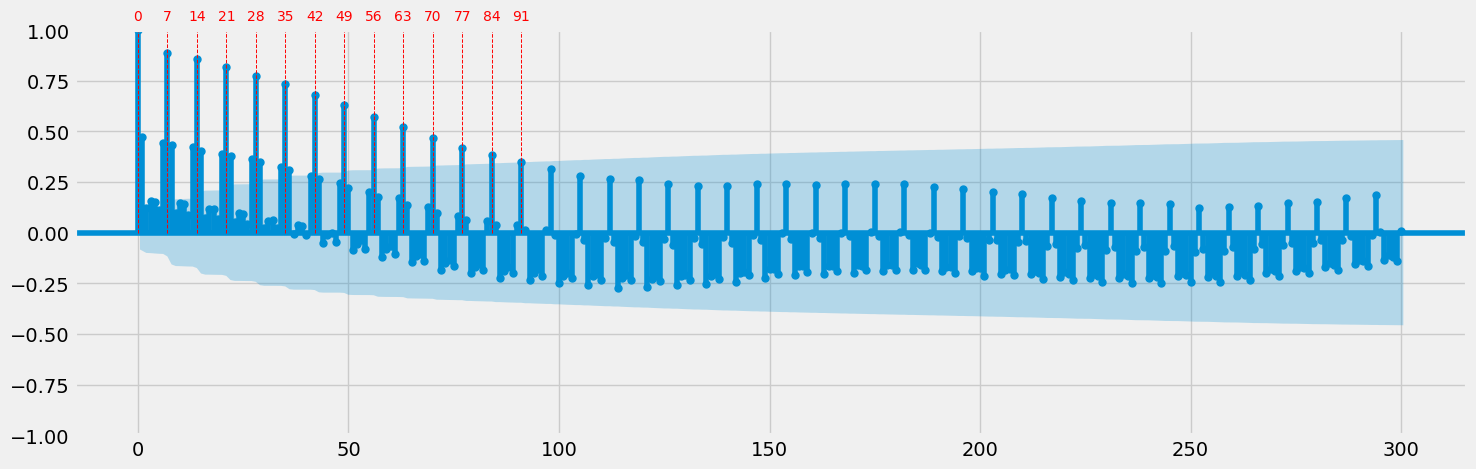

In [17]:
fig, ax = plt.subplots(figsize=(16, 5))

lines = [i*7 for i in range(14)]

plot_acf(concat, lags=300, ax=ax)
plt.vlines(lines, 0, 1, linestyles="dashed", color="red", linewidth=0.7)

for line in lines:
  ax.text(line, 1.05, str(line), color="red", ha='center', fontsize=10)

plt.title("")

plt.show()

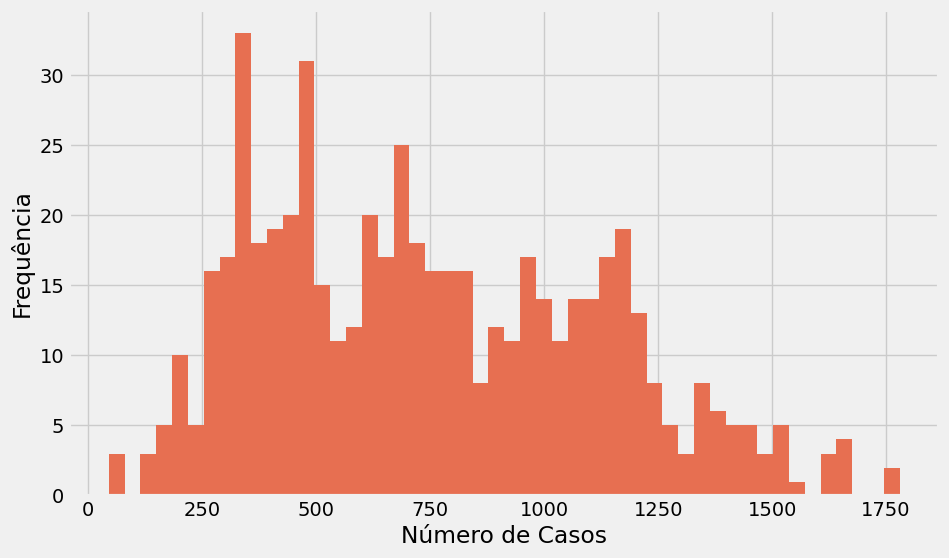

In [18]:
mean, std = concat.mean(), concat.std()

plt.figure(figsize=(10, 6))
plt.hist(concat, bins=50, color="#E76F51")
plt.xlabel('Número de Casos')
plt.ylabel('Frequência')
plt.show()

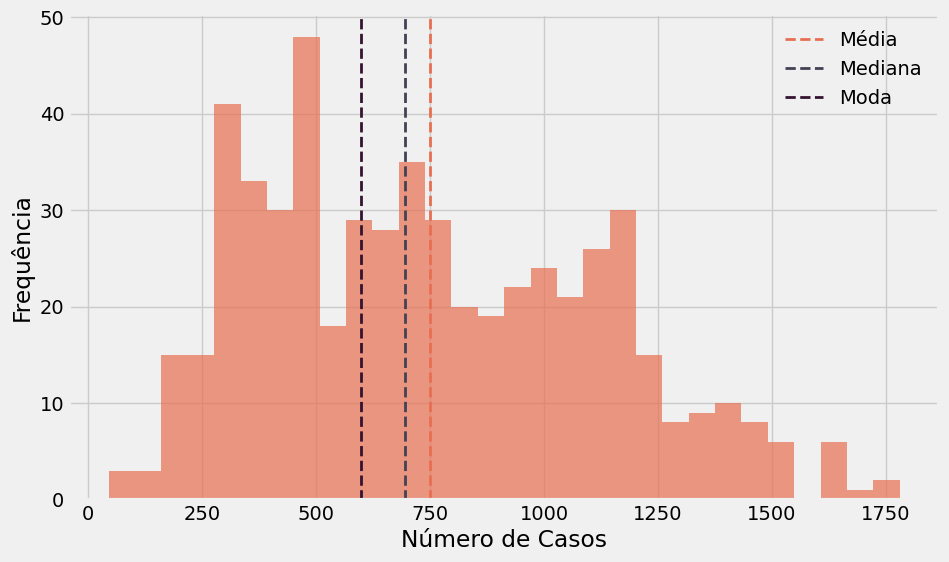

In [19]:
mean = concat.mean()
median = concat.median()
mode = concat.mode()[0]

plt.figure(figsize=(10, 6))
plt.hist(concat, bins=30, color="#E76F51", alpha=0.7)

plt.axvline(mean, color="#E76F51", linestyle='dashed', linewidth=2, label='Média')
plt.axvline(median, color='#424254', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(mode, color='#351330', linestyle='dashed', linewidth=2, label='Moda')

plt.xlabel('Número de Casos')
plt.ylabel('Frequência')
plt.legend(frameon=False)

plt.show()

# Extra

In [157]:
def get_ipca_data():
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df['valor'] = pd.to_numeric(df['valor'])
    df.set_index('data', inplace=True)
    return df

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

def kpss_test(series, regression='c'):
    result = kpss(series, regression=regression)
    return {
        'KPSS Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[3]
    }

def is_stationary(adf_pvalue, kpss_pvalue):
    adf_stationary = adf_pvalue < 0.05
    kpss_stationary = kpss_pvalue > 0.05
    return adf_stationary and kpss_stationary

In [158]:
ipca_df = get_ipca_data()
ipca_df = ipca_df[ipca_df.index >= '2020-01-01']
ipca_df = ipca_df[ipca_df.index <= '2024-01-01']

ibovespa = yf.download('^BVSP', start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


## IPCA

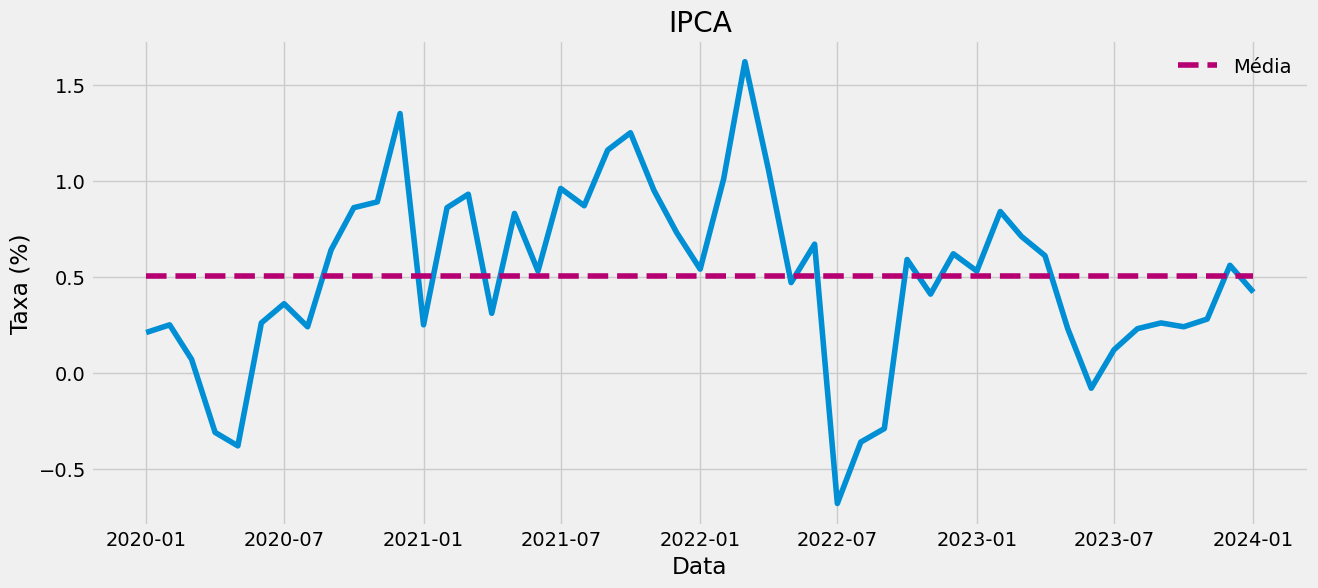

In [177]:
plt.figure(figsize=(14, 6))

plt.plot(ipca_df.index, ipca_df['valor'])
plt.hlines(ipca_df['valor'].mean(), ipca_df.index[0], ipca_df.index[-1], color="#B60071", linestyles="dashed", label="Média")
plt.xlabel('Data')
plt.ylabel('Taxa (%)')
plt.title('IPCA')

plt.legend(frameon=False)
plt.show()

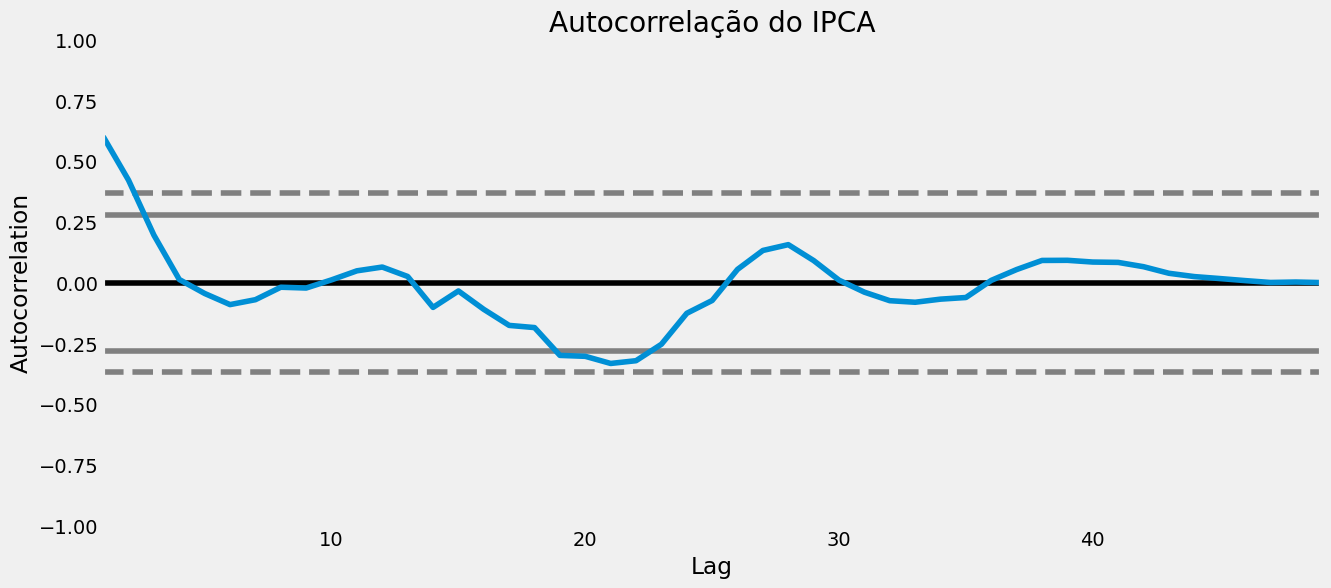

In [164]:
plt.figure(figsize=(14, 6))

autocorrelation_plot(ipca_df['valor'])

plt.title('Autocorrelação do IPCA')

plt.show()

In [ ]:
ipca_adf_result = adf_test(ipca_df['valor'])
ipca_kpss_result = kpss_test(ipca_df['valor'])

<ipython-input-157-3bc8a94fdfd0>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression=regression)


In [ ]:
print("IPCA ADF Test Results:")
for key, value in ipca_adf_result.items():
    print(f'{key}: {value}')

IPCA ADF Test Results:
ADF Statistic: -3.4035456603049243
p-value: 0.010838592520425088
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}


In [ ]:
print("IPCA KPSS Test Results:")
for key, value in ipca_kpss_result.items():
    print(f'{key}: {value}')

IPCA KPSS Test Results:
KPSS Statistic: 0.1550065023550162
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
ipca_stationary = is_stationary(ipca_adf_result['p-value'], ipca_kpss_result['p-value'])

print(ipca_stationary)

True


## IBOVESPA

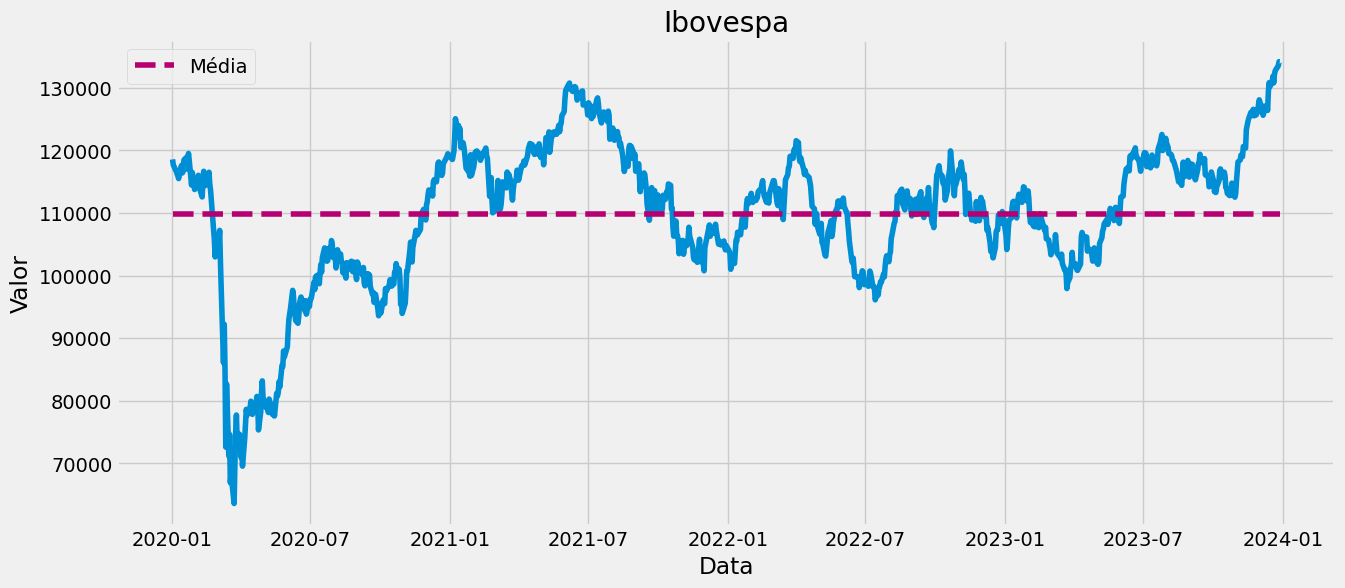

In [176]:
plt.figure(figsize=(14, 6))

plt.plot(ibovespa.index, ibovespa['Close'])
plt.hlines(ibovespa['Close'].mean(), ibovespa.index[0], ibovespa.index[-1], color="#B60071", linestyles="dashed", label="Média")
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Ibovespa')

plt.legend(frameon=False)
plt.show()

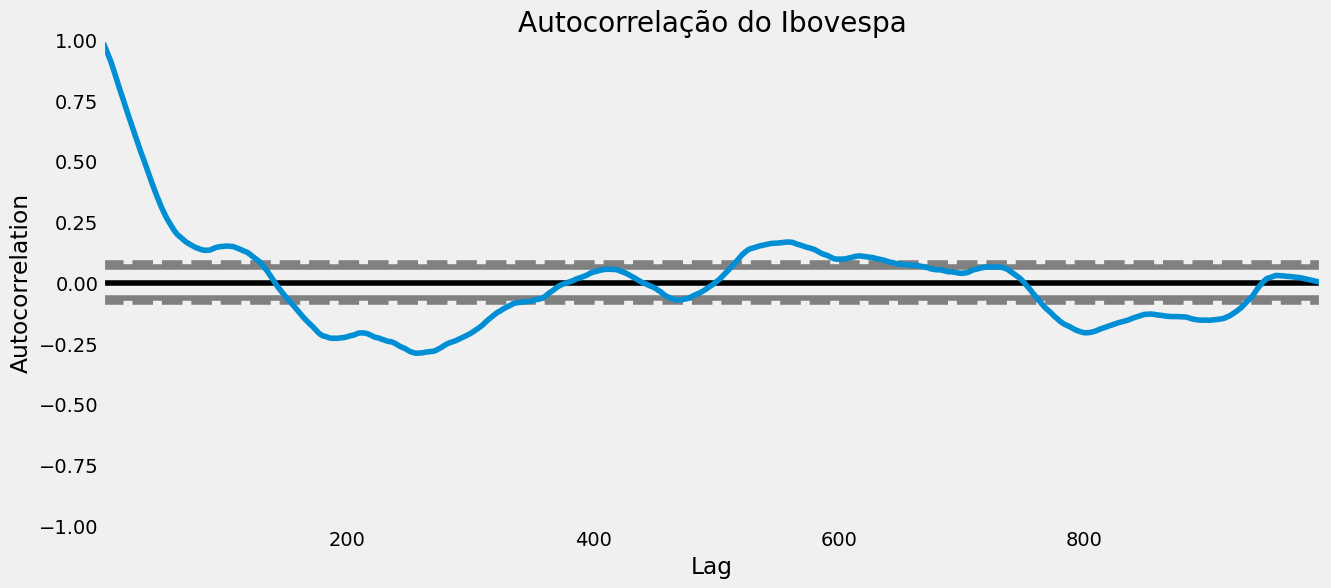

In [167]:
plt.figure(figsize=(14, 6))

autocorrelation_plot(ibovespa['Close'])

plt.title('Autocorrelação do Ibovespa')

plt.show()

In [ ]:
ibovespa_adf_result = adf_test(ibovespa['Close'])
ibovespa_kpss_result = kpss_test(ibovespa['Close'])

In [168]:
print("Ibovespa ADF Test Results:")
for key, value in ibovespa_adf_result.items():
    print(f'{key}: {value}')

Ibovespa ADF Test Results:
ADF Statistic: -2.176264199173752
p-value: 0.21497267816135052
Critical Values: {'1%': -3.4370062675076807, '5%': -2.8644787205542492, '10%': -2.568334722615888}


In [169]:
print("Ibovespa KPSS Test Results:")
for key, value in ibovespa_kpss_result.items():
    print(f'{key}: {value}')

Ibovespa KPSS Test Results:
KPSS Statistic: 0.9284015119631068
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [170]:
ibovespa_stationary = is_stationary(ibovespa_adf_result['p-value'], ibovespa_kpss_result['p-value'])

print(ibovespa_stationary)

False
